In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from model_archi import PlantVillageCNN
from utlis import get_data_loaders

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
train_loader, val_loader = get_data_loaders()

146


In [4]:
model = PlantVillageCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 5

TRAINING THE CNN CLASSIFICATION MODEL

In [5]:
from training_utils import train_model, plot_training_history

# Train the model
training_history = train_model(
    model=model, 
    train_loader=train_loader, 
    val_loader=val_loader, 
    criterion=criterion, 
    optimizer=optimizer, 
    num_epochs=num_epochs, 
    device=device,
)

Validating: 100%|██████████| 16/16 [00:01<00:00,  8.10it/s]


Epoch [1/5] | Training Loss: 1.7945 | Validation Loss: 1.4977 | Validation Accuracy: 0.4700 


Validating: 100%|██████████| 16/16 [00:01<00:00,  8.27it/s]


Epoch [2/5] | Training Loss: 1.3690 | Validation Loss: 1.1661 | Validation Accuracy: 0.5780 


Validating: 100%|██████████| 16/16 [00:01<00:00,  8.10it/s]


Epoch [3/5] | Training Loss: 1.1809 | Validation Loss: 0.9311 | Validation Accuracy: 0.6440 


Validating: 100%|██████████| 16/16 [00:02<00:00,  7.78it/s]


Epoch [4/5] | Training Loss: 1.0897 | Validation Loss: 0.8682 | Validation Accuracy: 0.6700 


Validating: 100%|██████████| 16/16 [00:02<00:00,  7.81it/s]

Epoch [5/5] | Training Loss: 1.0463 | Validation Loss: 0.7548 | Validation Accuracy: 0.7440 
Training completed!


TRAINING VISUALIZATION

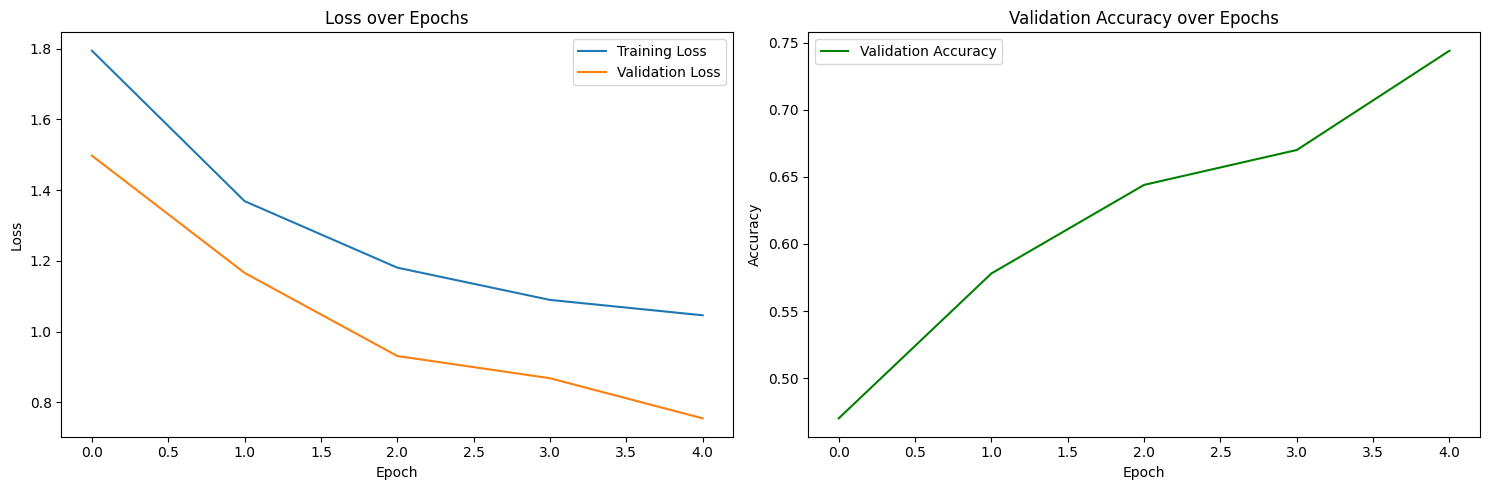

In [6]:
plot_training_history(training_history)

Below is the  performance of our costum network. As we can see, the network performs poorly on the class "Tomato___Bacterial_spot". 

In [7]:
from visualization_utils import plot_class_accuracies, evaluate_model

# Your existing class labels
class_labels = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy',
                'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
                'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
                'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

# Evaluate the model
overall_accuracy, accuracies, wrong_counts = evaluate_model(model, val_loader, class_labels, device)

Overall Accuracy: 0.744
Wrong predictions for class Tomato___Bacterial_spot: 68
Class Tomato___Bacterial_spot Accuracy: 0.32
Wrong predictions for class Tomato___Early_blight: 47
Class Tomato___Early_blight Accuracy: 0.53
Wrong predictions for class Tomato___healthy: 19
Class Tomato___healthy Accuracy: 0.81
Wrong predictions for class Tomato___Late_blight: 33
Class Tomato___Late_blight Accuracy: 0.67
Wrong predictions for class Tomato___Leaf_Mold: 16
Class Tomato___Leaf_Mold Accuracy: 0.84
Wrong predictions for class Tomato___Septoria_leaf_spot: 19
Class Tomato___Septoria_leaf_spot Accuracy: 0.81
Wrong predictions for class Tomato___Spider_mites Two-spotted_spider_mite: 42
Class Tomato___Spider_mites Two-spotted_spider_mite Accuracy: 0.58
Wrong predictions for class Tomato___Target_Spot: 5
Class Tomato___Target_Spot Accuracy: 0.95
Wrong predictions for class Tomato___Tomato_mosaic_virus: 0
Class Tomato___Tomato_mosaic_virus Accuracy: 1.0
Wrong predictions for class Tomato___Tomato_Yell

Visualizing the results in Bar Chart

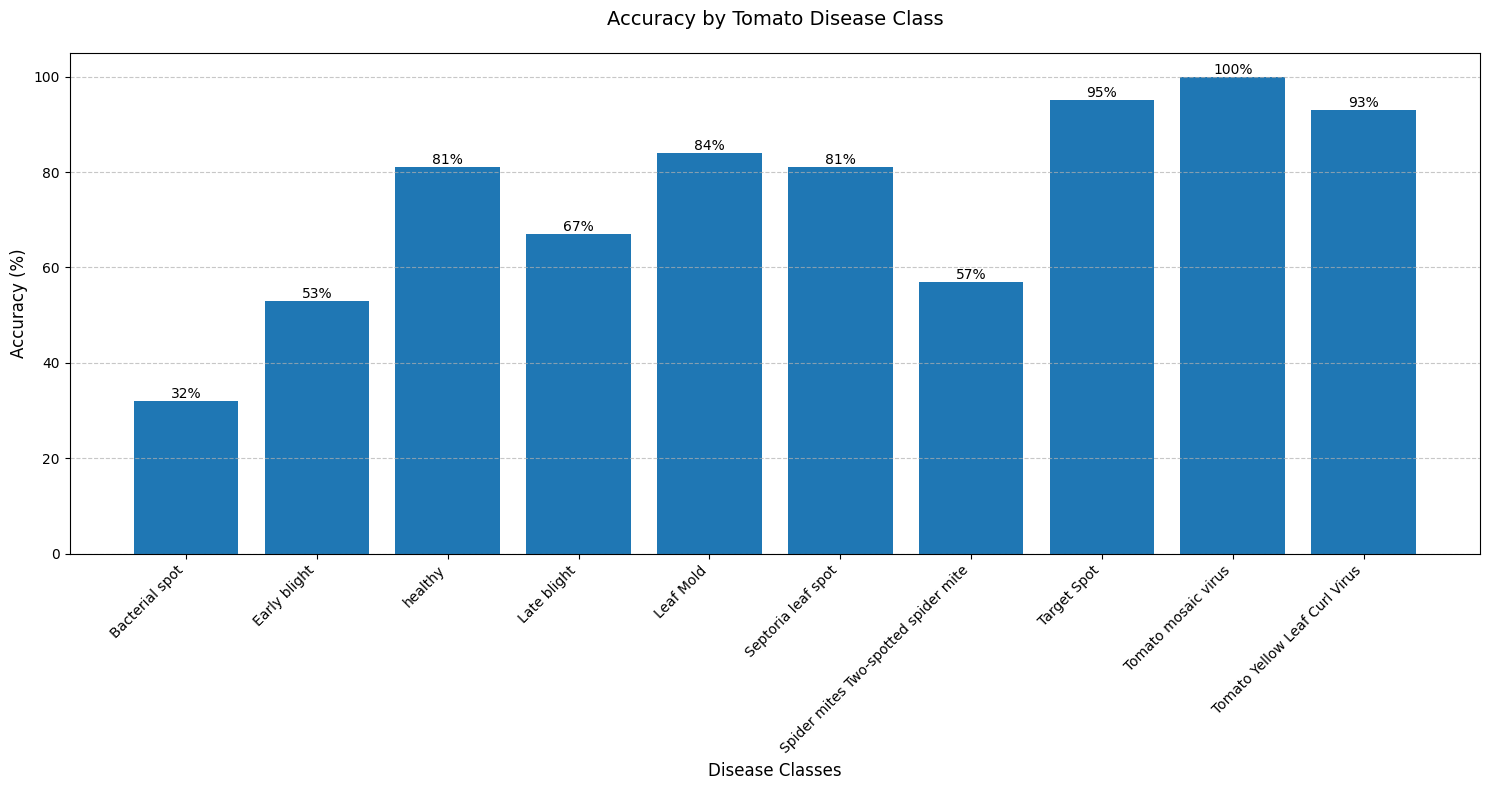

In [8]:
plot_class_accuracies(class_labels, accuracies)

Keeping a copy of the original weights (cloning them) so later we can prove that a fine-tuning with LoRA doesn't alter the original weights

In [9]:
original_weights = {}
for name, param in model.named_parameters():
    original_weights[name] = param.clone().detach()

Let's visualize how many parameters are in the original network, before introducing the LoRA matrices.

In [10]:
# Initialize the total parameters counter
total_parameters_original = 0

# Iterate over all layers in the model
for index, layer in enumerate(model.children()):
    if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.Linear):
        total_parameters_original += layer.weight.nelement()
        if layer.bias is not None:
            total_parameters_original += layer.bias.nelement()
        print(f'Layer {index+1}: W: {layer.weight.shape} + B: {layer.bias.shape if layer.bias is not None else "N/A"}')

print(f'Total number of parameters: {total_parameters_original:,}')

Layer 1: W: torch.Size([32, 3, 3, 3]) + B: torch.Size([32])
Layer 3: W: torch.Size([16, 32, 3, 3]) + B: torch.Size([16])
Layer 5: W: torch.Size([8, 16, 3, 3]) + B: torch.Size([8])
Layer 7: W: torch.Size([128, 2048]) + B: torch.Size([128])
Layer 9: W: torch.Size([10, 128]) + B: torch.Size([10])
Total number of parameters: 270,242


In [11]:
# Save the trained modeln 
torch.save(model.state_dict(), 'sequential_model.pth')
print('Saved trained model as sequential_model.pth')

Saved trained model as sequential_model.pth
